##Import librerie

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from collections import defaultdict

In [ ]:
import sys
sys.path.append('./')

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras import Sequential

# Used for L2 regularization
from tensorflow.keras import regularizers

# Used for dropout
from tensorflow.keras.layers import Dropout

# Used for early stopping
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.losses import MeanSquaredError

Connessione al servizio Drive Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Gestione dei Data Set di Training e Test

lettura e stampa del training set

In [ ]:
dataset="/content/drive/My Drive/Machine Learning Project/monks/monks-1_train.csv"
df_train = pd.DataFrame(pd.read_csv(dataset))

# Store the number of training patterns
n_TR_patterns = len(df_train.index)
print(f'Numero righe TR: {n_TR_patterns}\n')
df_train.head()

Numero righe TR: 124



,classe,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1


In [ ]:
# Label encoding the data
  
le = LabelEncoder()
  
df_train['a1']= le.fit_transform(df_train['a1'])
df_train['a2']= le.fit_transform(df_train['a2'])
df_train['a3']= le.fit_transform(df_train['a3'])
df_train['a4']= le.fit_transform(df_train['a4'])
df_train['a5']= le.fit_transform(df_train['a5'])
df_train['a6']= le.fit_transform(df_train['a6'])

y2 = pd.get_dummies(df_train.a1, prefix='a1')
y3 = pd.get_dummies(df_train.a2, prefix='a2')
y4 = pd.get_dummies(df_train.a3, prefix='a3')
y5 = pd.get_dummies(df_train.a4, prefix='a4')
y6 = pd.get_dummies(df_train.a5, prefix='a5')
y7 = pd.get_dummies(df_train.a6, prefix='a6')

df_train = df_train.drop("a1", axis=1)
df_train = df_train.drop("a2", axis=1)
df_train = df_train.drop("a3", axis=1)
df_train = df_train.drop("a4", axis=1)
df_train = df_train.drop("a5", axis=1)
df_train = df_train.drop("a6", axis=1)


frames = [df_train,y2,y3,y4,y5,y6,y7]

df_train = pd.concat(frames, axis=1, join='inner')
display(df_train)

,classe,a1_0,a1_1,a1_2,a2_0,a2_1,a2_2,a3_0,a3_1,a4_0,a4_1,a4_2,a5_0,a5_1,a5_2,a5_3,a6_0,a6_1
0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1
2,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1
120,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1
121,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
122,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


lettura e stampa del test set

In [ ]:
dataset="/content/drive/My Drive/Machine Learning Project/monks/monks-1_test.csv"
df_test = pd.DataFrame(pd.read_csv(dataset))
df_test.head()

,classe,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1
3,1,1,1,1,1,2,2
4,1,1,1,1,1,3,1


In [ ]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df_test['a1']= le.fit_transform(df_test['a1'])
df_test['a2']= le.fit_transform(df_test['a2'])
df_test['a3']= le.fit_transform(df_test['a3'])
df_test['a4']= le.fit_transform(df_test['a4'])
df_test['a5']= le.fit_transform(df_test['a5'])
df_test['a6']= le.fit_transform(df_test['a6'])

y2 = pd.get_dummies(df_test.a1, prefix='a1')
y3 = pd.get_dummies(df_test.a2, prefix='a2')
y4 = pd.get_dummies(df_test.a3, prefix='a3')
y5 = pd.get_dummies(df_test.a4, prefix='a4')
y6 = pd.get_dummies(df_test.a5, prefix='a5')
y7 = pd.get_dummies(df_test.a6, prefix='a6')

df_test = df_test.drop("a1", axis=1)
df_test = df_test.drop("a2", axis=1)
df_test = df_test.drop("a3", axis=1)
df_test = df_test.drop("a4", axis=1)
df_test = df_test.drop("a5", axis=1)
df_test = df_test.drop("a6", axis=1)


frames = [df_test,y2,y3,y4,y5,y6,y7]

df_test = pd.concat(frames, axis=1, join='inner')
display(df_test)

,classe,a1_0,a1_1,a1_2,a2_0,a2_1,a2_2,a3_0,a3_1,a4_0,a4_1,a4_2,a5_0,a5_1,a5_2,a5_3,a6_0,a6_1
0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
4,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
428,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0
429,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
430,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0


divisione in training set e validation set

In [ ]:
class_name = 'classe'

attributes = [col for col in df_train.columns if col != class_name]
X = df_train[attributes].values
y = df_train[class_name]



n_features = X_train.shape[1]

gestione del test set

In [ ]:
attributes = [col for col in df_test.columns if col != class_name]
X_test = df_test[attributes].values
y_test = df_test[class_name]

#Costruzione della Rete Neurale

In [ ]:
# Units hidden layer
units_hid = 3

definizione del modello: 
- topologia
- optimizer / learning rate

Paper originale Monks disponibile [qui](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.45.2363&rep=rep1&type=pdf) (capitolo 9, inizia da pagina 112 segnata 101).

(Per regularization: nelle slide di teoria si menziona "Over *all* the weights in the network".)

In [ ]:
def build_model():

  # Build the model   
  model = Sequential()
  
  # No regularization
  layer_1 = Dense(units_hid, input_dim=n_features, activation='relu')
  layer_2 = Dense(1, activation='sigmoid')

  model.add(layer_1)
  model.add(layer_2)
 
  model.compile(loss=MeanSquaredError(), 
                optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-06, name="Adamax"),
                metrics=['accuracy'])
   
  return model

modifica pesi iniziali 

In [ ]:
def init_config():
  config_in = []
  config_hid = []

  # weights_in = np.random.uniform(-0.2, 0.2, size=(n_features,units_hid))
  r = 1/math.sqrt(n_features)
  weights_in = np.random.uniform(-r, r, size=(n_features,units_hid))
  # bias_in = np.random.uniform(-0.2, 0.2, units_hid)
  bias_in = np.zeros(units_hid)
  config_in.append(weights_in)
  config_in.append(bias_in)

  # weights_hid = np.random.uniform(-0.3, 0.3, size=(units_hid,1))
  r = 1/math.sqrt(units_hid)
  weights_hid = np.random.uniform(-r, r, size=(units_hid,1))
  # bias_hid = np.random.uniform(-0.2, 0.2, 1)
  bias_hid = np.zeros(1)
  config_hid.append(weights_hid)
  config_hid.append(bias_hid)

  return [config_in, config_hid]

Definizione callback per Early Stopping e costruzione modello.

In [ ]:
early_val_loss = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=70,
    mode="min",
    restore_best_weights=False,
)

early_val_accuracy = EarlyStopping(
    monitor="val_accuracy",
    patience=70,
    mode="max",
    restore_best_weights=False,
)

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


# Multiple Minima

Fitting della rete su training e validation set, per 10 configurazioni di pesi iniziali.

Per i Monks, vista anche la dimensione ridotta del training set, scegliamo la versione batch: questa ci permette di stimare il gradiente in modo più preciso.


In [ ]:
def multiple_configs(model, n_configs = 10, n_epochs = 500, early_stopping = True):
  list_of_config = []
  list_of_history = []

  mean_val_loss = 0
  mean_val_accuracy = 0

  min_val_loss = 100
  confi_min_loss = 0

  max_val_accuracy = 0
  confi_max_accuracy = 0

  # Used to cut off average plots
  min_epochs = n_epochs

  for i in range(n_configs):
    # Ottengo i pesi iniziali
    config = init_config()

    # Assegno i pesi iniziali al modello
    # array_in = model.layers[0].set_weights(config[0])
    array_hid = model.layers[1].set_weights(config[1])

    list_of_config.append(config)
    print('Configurazione numero', i+1, '\n') 

    # Batch version
    # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss, early_val_accuracy]).history
    if early_stopping:
      history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns, callbacks=[early_val_loss]).history

      if early_val_loss.stopped_epoch != 0 and early_val_loss.stopped_epoch < min_epochs:
        min_epochs = early_val_loss.stopped_epoch
    else:
      history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=n_TR_patterns).history

    list_of_history.append(history)
    
    print('\n\nPerformance della configurazione', i+1, 'sul validation set\n')
    val_results = model.evaluate(X_val, y_val, verbose=1)
    print(f'Validation results - Loss: {val_results[0]} - Accuracy: {val_results[1]}%\n\n\n')

    mean_val_loss += val_results[0]
    mean_val_accuracy += val_results[1] 

    if(val_results[0] < min_val_loss):
      min_val_loss = val_results[0]
      confi_min_loss = i 

    if(val_results[1] > max_val_accuracy):
      max_val_accuracy = val_results[1]
      confi_max_accuracy = i 
  
  mean_val_loss = mean_val_loss / n_configs
  mean_val_accuracy = mean_val_accuracy / n_configs

  stats = [mean_val_loss, mean_val_accuracy, min_val_loss, confi_min_loss, max_val_accuracy, confi_max_accuracy, min_epochs]

  return stats, list_of_config, list_of_history

In [ ]:
n_configs = 10
# stats, list_of_config, list_of_history = multiple_configs(model, early_stopping=False)
stats, list_of_config, list_of_history = multiple_configs(model)

Output streaming troncato alle ultime 5000 righe.
Epoch 153/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 154/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 155/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 156/500
1/1 [==============================] - 0s 23ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 157/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 158/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 159/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0054 - accuracy: 1.000

#Analisi dei risultati

In [ ]:
print('-- Risultati modello "base" --')
print('Loss media su', n_configs, 'configurazioni:', stats[0])
print('Accuracy media su', n_configs, 'configurazioni:', stats[1], '\n')

print('Loss minima raggiunta:', stats[2])
print('Configurazione corrispondente:', stats[3]+1, '\n') 

print('Accuracy massima raggiunta:', stats[4])
print('Configurazione corrispondente:', stats[5]+1, '\n') 

-- Risultati modello "base" --
Loss media su 10 configurazioni: 0.06827915936009958
Accuracy media su 10 configurazioni: 0.9322580605745315 

Loss minima raggiunta: 0.0018306368729099631
Configurazione corrispondente: 10 

Accuracy massima raggiunta: 1.0
Configurazione corrispondente: 2 



In [ ]:
def plot_best(metric, confi_max, list_of_history):
  plt.plot(list_of_history[confi_max][metric], label='Train', color='blue')
  plt.plot(list_of_history[confi_max]['val_'+metric], label='Val', color='red', linestyle='dashed')

  plt.xlabel('Epochs',fontsize=15)
  if metric == 'accuracy':
    plt.ylabel('Accuracy', fontsize=15)
  else:
    plt.ylabel('MSE',fontsize=15)
    
  plt.title('Monks 1 - Best result',fontsize=15)
  plt.legend(fontsize=15)
  plt.show()

In [ ]:
def plot_average(metric, min_epochs, list_of_history):

  mean_hist = np.array(list_of_history[0][metric][0:min_epochs])
  mean_hist_val = np.array(list_of_history[0]['val_'+metric][0:min_epochs])

  for i in range(1, n_configs):
    mean_hist += np.array(list_of_history[i][metric][0:min_epochs])
    mean_hist_val += np.array(list_of_history[i]['val_'+metric][0:min_epochs])

  plt.plot(np.divide(mean_hist, n_configs), label='Train', color='blue')
  plt.plot(np.divide(mean_hist_val, n_configs), label='Val', color='red', linestyle='dashed')

  plt.xlabel('Epochs',fontsize=15)
  if metric == 'accuracy':
    plt.ylabel('Accuracy',fontsize=15)
  else:
    plt.ylabel('MSE',fontsize=15)

  plt.title('Monks 1 - Average result',fontsize=15)
  plt.legend(fontsize=15)
  plt.show()

Plot della configurazione migliore.

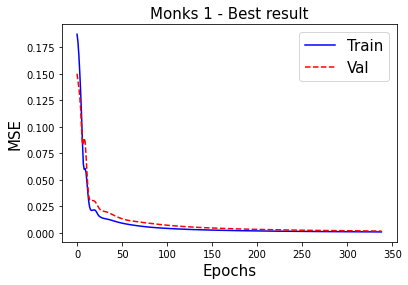

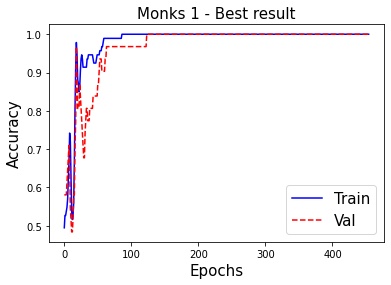

(None, None)

In [ ]:
plot_best('loss', stats[3], list_of_history), plot_best('accuracy', stats[5], list_of_history)

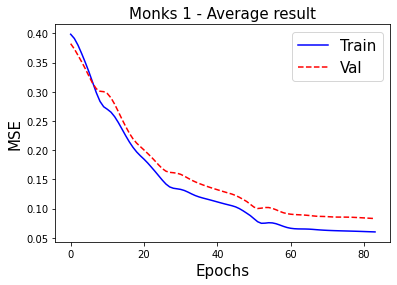

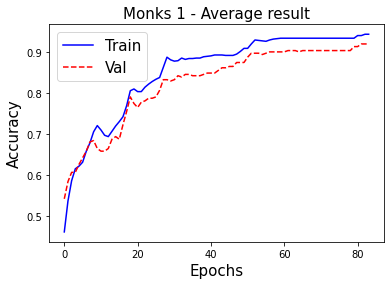

(None, None)

In [ ]:
plot_average('loss', stats[6], list_of_history), plot_average('accuracy', stats[6], list_of_history) 

# Esecuzione sul test set

In [ ]:
# Test the basic model
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f'Test results, basic model \n Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Test results, basic model 
 Loss: 0.0019384848419576883 - Accuracy: 1.0%
